In [6]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv('../Resources/collision_2022_classified.csv')
df

/var/folders/_7/4zts0j8d4413ps8jq10scqsr0000gn/T/ipykernel_95370/50224331.py:1: DtypeWarning: Columns (12,13,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Resources/collision_2022_classified.csv')


,crash_datetime,crash_day_of_week,crash_hour_category,street_address,number_of_persons_injured,number_of_persons_killed,number_of_pedestrians_injured,number_of_pedestrians_killed,number_of_cyclist_injured,number_of_cyclist_killed,...,contributing_factor,number_of_deaths,number_of_injuries,death_rate,injuries_rate,severity_of_accident,month,year,day_of_week,hour
0,2022-03-26 11:45:00,5,Other Hours,Queensboro Bridge Upper,1,0,0,0,0,0,...,Pavement Slippery,0,2,0.0,0.000165,Serious,3,2022,Saturday,11
1,2022-06-29 06:55:00,2,Early Morning,Throgs Neck Bridge,0,0,0,0,0,0,...,Following Too Closely,0,0,0.0,0.000000,Light,6,2022,Wednesday,6
2,2022-06-29 16:00:00,2,Rush Hours,Williamsburg Bridge Outer Roadwa,1,0,0,0,0,0,...,Driver Inattention/Distraction,0,2,0.0,0.000030,Serious,6,2022,Wednesday,16
3,2022-07-12 17:50:00,1,Rush Hours,44 Empire Boulevard,0,0,0,0,0,0,...,Oversized Vehicle,0,0,0.0,0.000000,Light,7,2022,Tuesday,17
4,2022-03-23 10:00:00,2,Other Hours,71 East Drive,0,0,0,0,0,0,...,Pedestrian/Bicyclist/Other Pedestrian Error/Co...,0,0,0.0,0.000000,Light,3,2022,Wednesday,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103784,2022-09-15 19:49:00,3,Rush Hours,East New York Avenue & Rockaway Parkway,0,0,0,0,0,0,...,Driver Inattention/Distraction,0,0,0.0,0.000000,Light,9,2022,Thursday,19
103785,2022-07-21 22:05:00,3,Late Night,Cross Island Parkway,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,22
103786,2022-12-31 02:00:00,5,Late Night,Tilden Avenue,1,0,0,0,0,0,...,Traffic Control Disregarded,0,2,0.0,0.000025,Serious,12,2022,Saturday,2
103787,2022-07-14 05:00:00,3,Early Morning,2501 Cortelyou Road,0,0,0,0,0,0,...,Unspecified,0,0,0.0,0.000000,Light,7,2022,Thursday,5


In [25]:
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


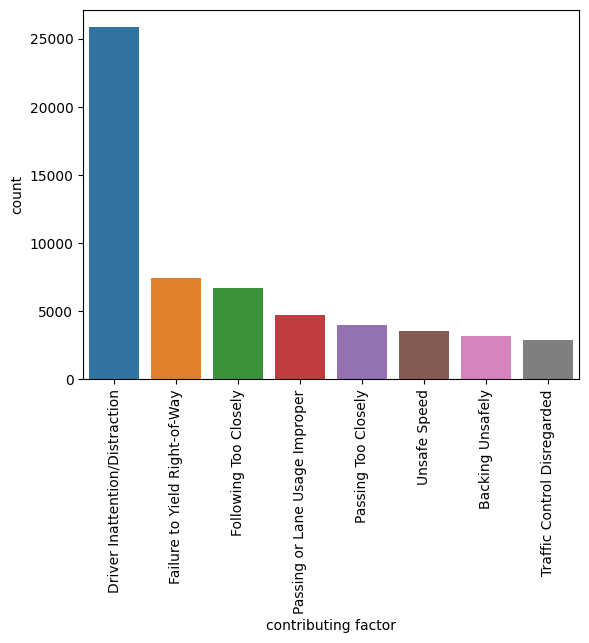

In [26]:
## Distribution of contributing factor
order = df['contributing_factor'].value_counts().nlargest(10).index
order = order[(order != "Unspecified") & (order != "Other Vehicular")]

sns.countplot(x='contributing_factor', data=df, order=order)
plt.xticks(rotation=90)
plt.xlabel("contributing factor")
plt.show()



/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


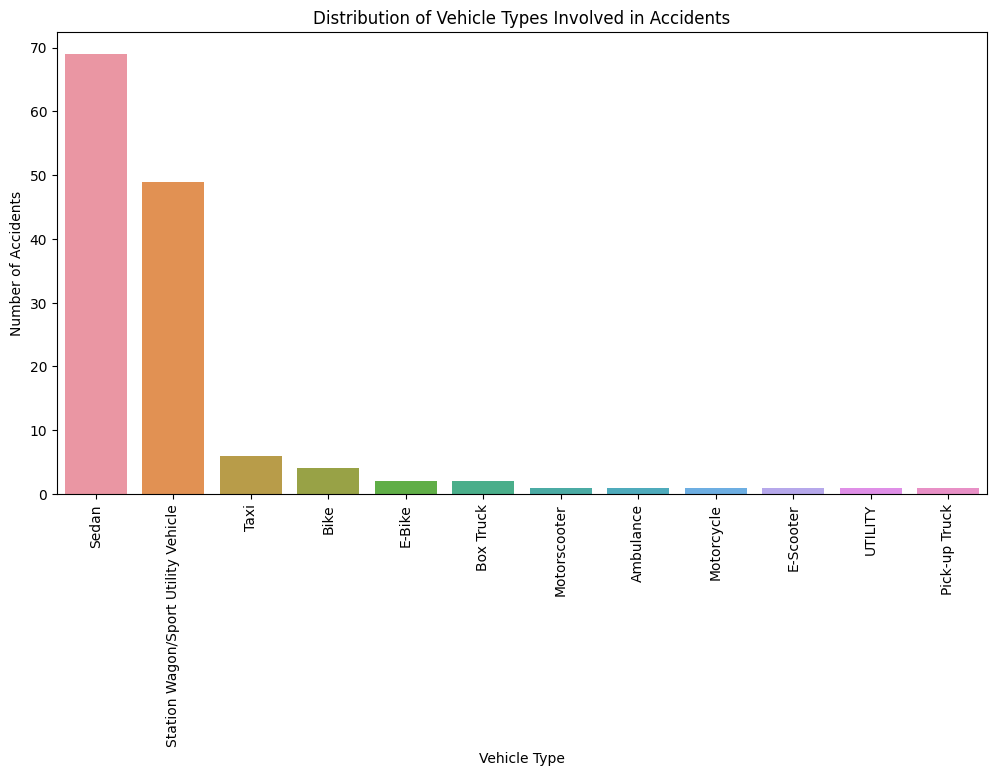

In [27]:
## Distribution of vehicle_type (detailed)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_code_1', data=df, order=df['vehicle_type_code_1'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents')
plt.show()

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


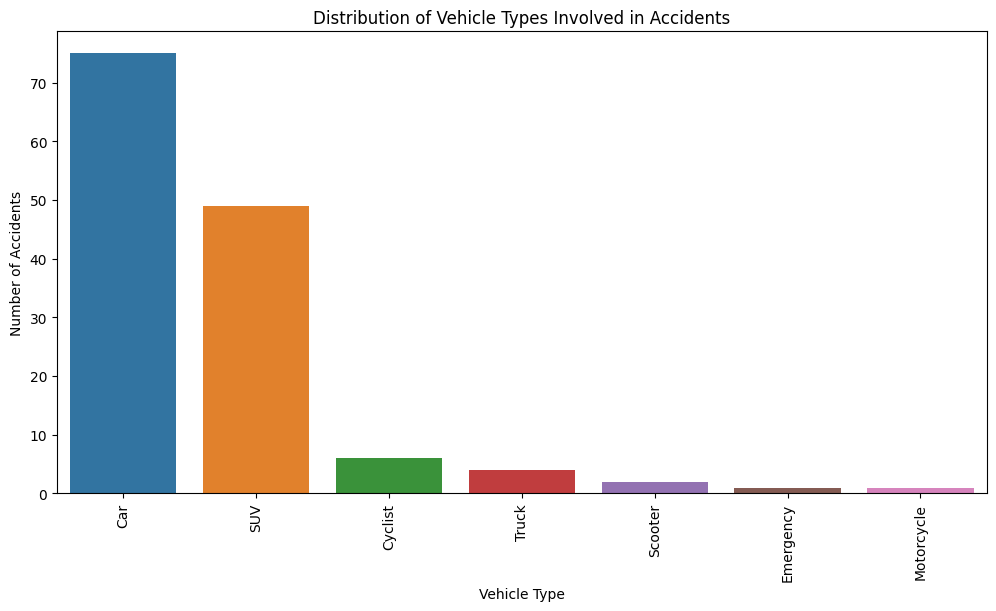

In [28]:
## Distribution of vehicle_type (general)
vehicle_type_mapping = {
    'Ambulance': 'Emergency',
    'Bike': 'Cyclist',
    'Box Truck': 'Truck',
    'E-Bike': 'Cyclist',
    'E-Scooter': 'Scooter',
    'Motorcycle': 'Motorcycle',
    'Motorscooter': 'Scooter',
    'Pick-up Truck': 'Truck',
    'Sedan': 'Car',
    'Station Wagon/Sport Utility Vehicle': 'SUV',
    'Taxi': 'Car',
    'UTILITY': 'Truck'
}

df['vehicle_type_group'] = df['vehicle_type_code_1'].replace(vehicle_type_mapping)

plt.figure(figsize=(12, 6))
sns.countplot(x='vehicle_type_group', data=df, order=df['vehicle_type_group'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Vehicle Types Involved in Accidents')
plt.show()

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


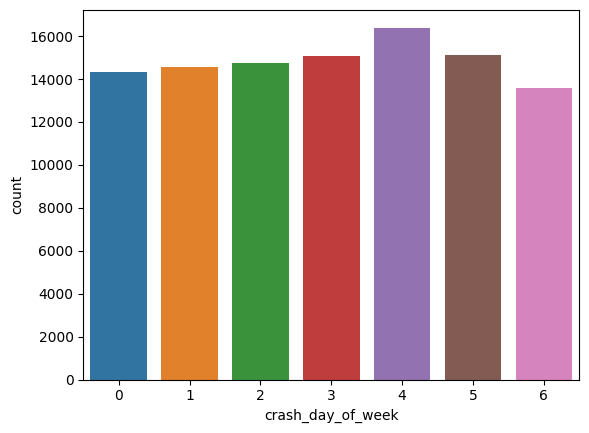

/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/siyunyan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


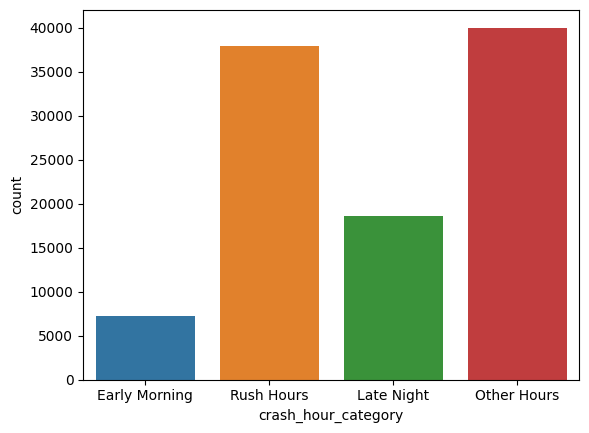

In [29]:
## temporal analysis
# Number of accidents by day of the week
sns.countplot(x='crash_day_of_week', data=df)
plt.show()

# Number of accidents by hour
hour_category_order = ['Early Morning', 'Rush Hours', 'Late Night', 'Other Hours']
sns.countplot(x='crash_hour_category', data=df,order=hour_category_order)
plt.show()

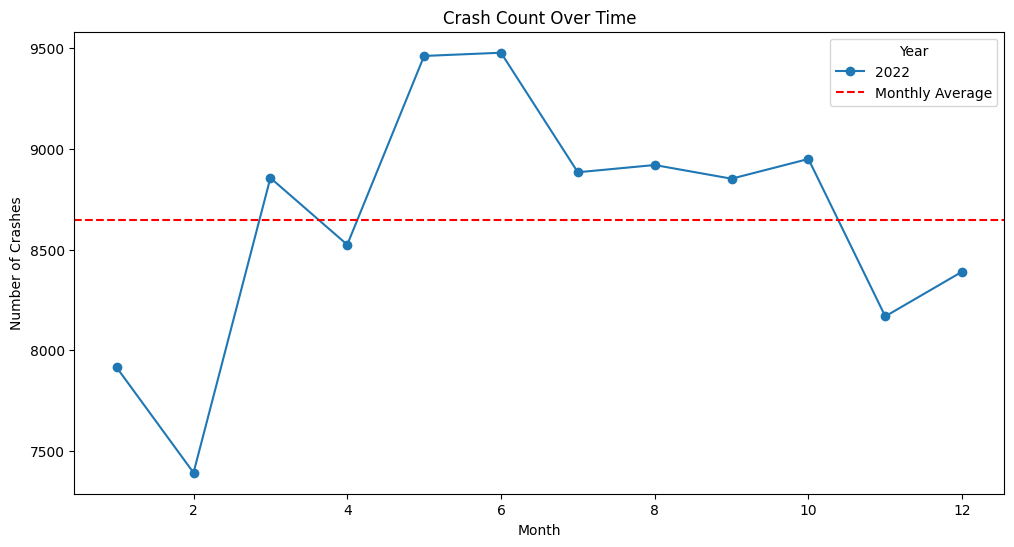

In [30]:
# seasonality by month
seasonality_data = df.pivot_table(index='month', columns='year', values='crash_datetime', aggfunc='count')
monthly_avg = df.groupby('month').size().mean()
ax= seasonality_data.plot(marker='o', figsize=(12, 6))
ax.axhline(y=monthly_avg, color='r', linestyle='--', label='Monthly Average')
plt.title('Crash Count Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.legend(title='Year')
plt.show()

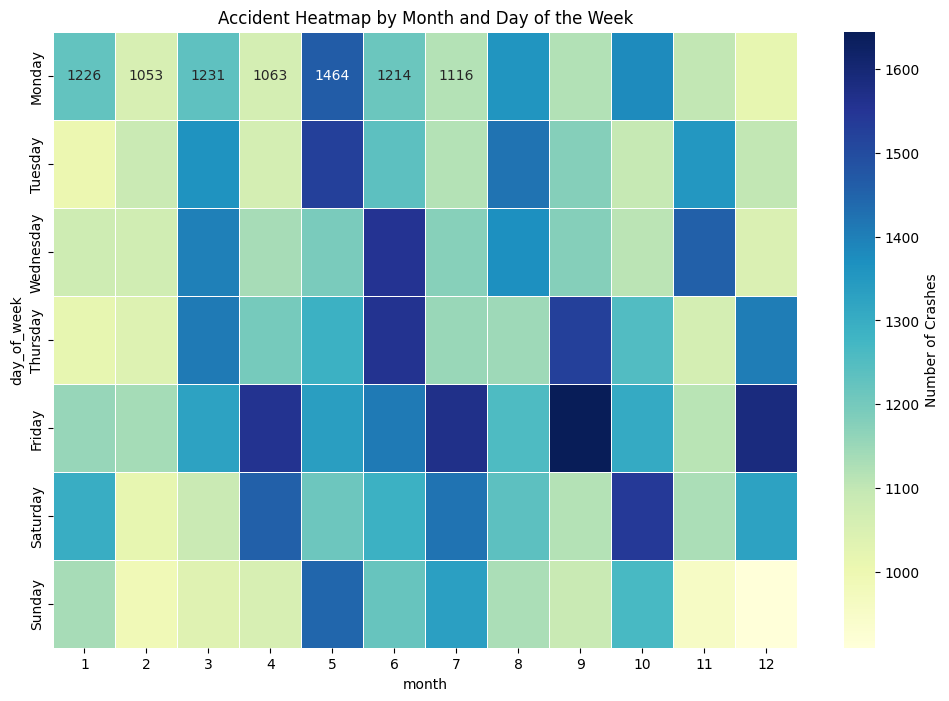

In [34]:
## heatmap - correlation between month and day for the number of crashes
# Create a pivot table to count the number of crashes for each month and day of the week
heatmap_data = df.pivot_table(index='day_of_week', columns='month', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Month and Day of the Week')
plt.show()

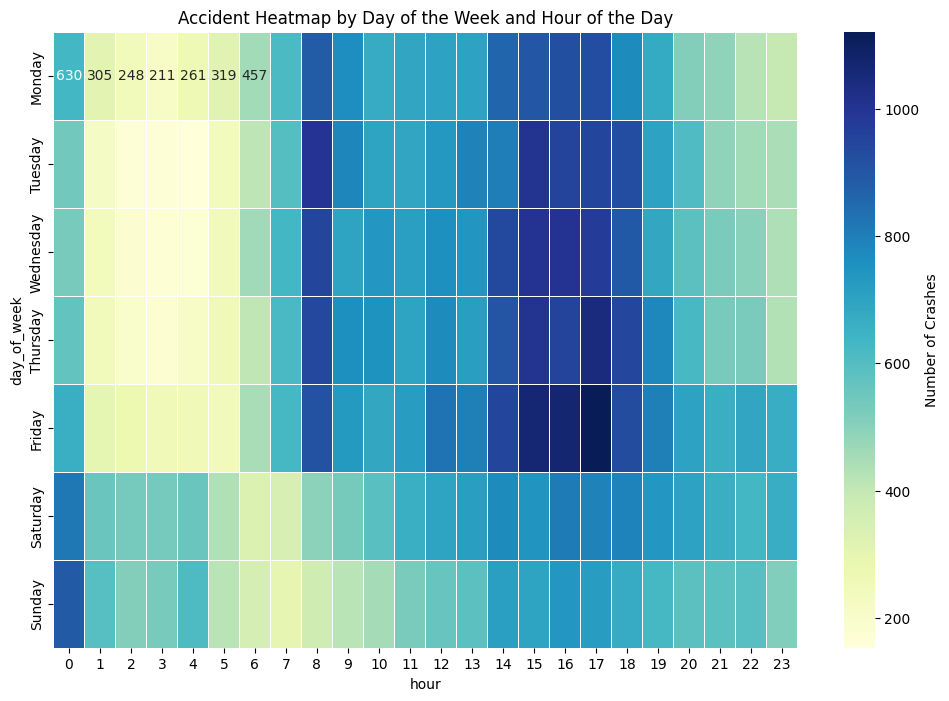

In [32]:
## heatmap - correlation between week and hour for the number of crashes
# Create a pivot table to count the number of crashes for each day of the week and hour of the day
heatmap_data = df.pivot_table(index='day_of_week', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(days_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Day of the Week and Hour of the Day')
plt.show()

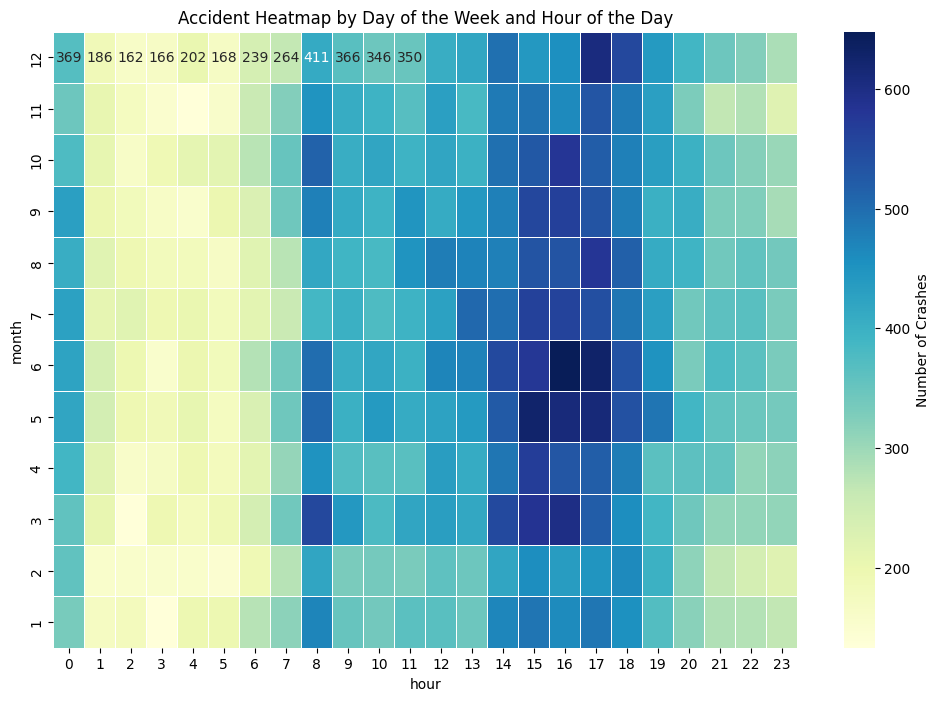

In [37]:
## heatmap - correlation between month and hour for the number of crashes
# Create a pivot table to count the number of crashes for each month and hour of the day
heatmap_data = df.pivot_table(index='month', columns='hour', values='crash_datetime', aggfunc='count', fill_value=0)

# Reorder the days of the week for better visualization
month_order = np.arange(12,0,-1)
heatmap_data = heatmap_data.reindex(month_order)

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, cbar_kws={'label': 'Number of Crashes'})
plt.title('Accident Heatmap by Day of the Week and Hour of the Day')
plt.show()